[@LorenaABarba](https://twitter.com/LorenaABarba)

12 steps to Navier–Stokes
=====
***

You see where this is going ... we'll do 2D diffusion now and next we will combine steps 6 and 7 to solve Burgers' equation. So make sure your previous steps work well before continuing.

Step 7: 2D Diffusion
----
***

And here is the 2D-diffusion equation:

$$\frac{\partial u}{\partial t} = \nu \frac{\partial ^2 u}{\partial x^2} + \nu \frac{\partial ^2 u}{\partial y^2}$$

You will recall that we came up with a method for discretizing second order derivatives in Step 3, when investigating 1-D diffusion.  We are going to use the same scheme here, with our forward difference in time and two second-order derivatives. 

$$\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} = \nu \frac{u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n}{\Delta x^2} + \nu \frac{u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2}$$

Once again, we reorganize the discretized equation and solve for $u_{i,j}^{n+1}$

$$
\begin{split}
u_{i,j}^{n+1} = u_{i,j}^n &+ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n) \\
&+ \frac{\nu \Delta t}{\Delta y^2}(u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n)
\end{split}
$$

In [1]:
import numpy
from matplotlib import pyplot, cm
from matplotlib import animation, rc
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
###variable declarations
nx = 41
ny = 41
nt = 50
nu = .01
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
dt = dx * dy / nu * .25

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)
u = numpy.ones((ny, nx))  # create a 1xn vector of 1's

###Assign initial conditions
# set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2  

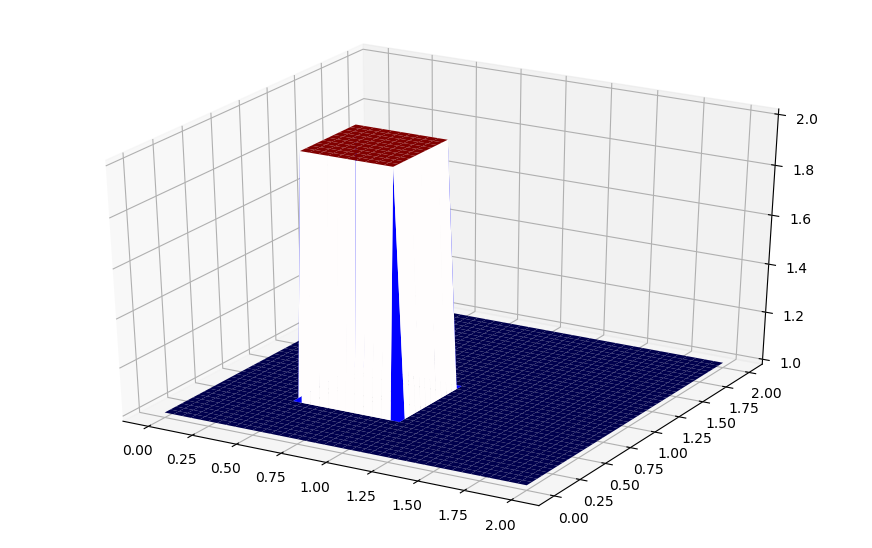

In [3]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')       
ax.set_zlim3d(1,2)
X, Y = numpy.meshgrid(x, y)                            
surf = [ax.plot_surface(X, Y, u[:], cmap=cm.seismic)]

$$
\begin{split}
u_{i,j}^{n+1} = u_{i,j}^n &+ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n) \\
&+ \frac{\nu \Delta t}{\Delta y^2}(u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n)
\end{split}
$$

In [4]:
###Ru_old through nt timesteps
def diffusion(n, u, u_old, surf):
    u_old = u.copy()
    u[1:-1, 1:-1] = (u_old[1:-1,1:-1] + 
                    nu * dt / dx**2 * (u_old[1:-1, 2:] - 2 * u_old[1:-1, 1:-1] + u_old[1:-1, 0:-2]) +
                    nu * dt / dy**2 * (u_old[2:,1: -1] - 2 * u_old[1:-1, 1:-1] + u_old[0:-2, 1:-1]))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    surf[0].remove()
    surf[0] = ax.plot_surface(X, Y, u[:], cmap=cm.seismic)

u_old = u
anim = animation.FuncAnimation(fig, diffusion, fargs=(u,u_old,surf), frames=nt, interval=50)
HTML(anim.to_html5_video())

## Learn More

The video lesson that walks you through the details for Steps 5 to 8 is **Video Lesson 6** on You Tube:

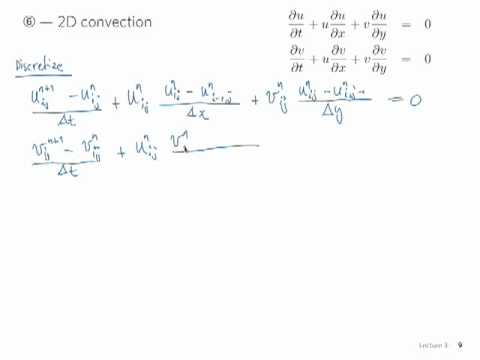

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('tUg_dE3NXoY')

In [6]:
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()

> (The cell above executes the style for this notebook.)